# Modelado de distribuciones por radio censal

El presente ejemplo describe algunas estrategias de asignación de casos por radio censal para una variable desconocida (e.g.`viviendas en condiciones de vulnerabilidad-informalidad urbana`) cuando no se dispone de las geometrías del precenso 2020.

**A continuación se detalla:**

1. Estimación del total de viviendas/hogares cuando la información del precenso 2020 es desconocida
2. Estimación del total de viviendas/hogares por categorías a partir del total estimado en `1`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
from CENSAr.datasources import (
    personas_radios_prov,
    tipoviv_radios_prov,
    radios_prov,
    radios_eph_censo_2010,
    persproy_depto_2025,
)

In [ ]:
import geopandas as gpd
envolvente_resistencia_00 = gpd.read_file('../CENSAr/data/ManchaUrbana_Resistencia_1999.geojson')

In [5]:
# GEOMETRIAS
envolvente = radios_eph_censo_2010(aglo_idx="08")
chaco_2001 = radios_prov(year=2001, prov="chaco", mask=envolvente)
chaco_2010 = radios_prov(year=2010, prov="chaco", mask=envolvente)

[11:31:14] INFO     https://storage.googleapis.com/python_mdg/censar_carto/radios_eph_json.zip   ]8;id=93708;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=22901;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#103\103]8;;\

[11:31:18] ERROR    Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.                         ]8;id=166702;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py\geodataframe.py]8;;\:]8;id=741658;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py#635\635]8;;\
                                                                                                                   

           ERROR    Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.                         ]8;id=980027;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py\geodataframe.py]8;;\:]8;id=146945;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py#635\635]8;;\
                                                                                                                   

[11:31:25] ERROR    Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.                         ]8;id=110679;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py\geodataframe.py]8;;\:]8;id=487832;file:///home/fede/CEEU/CENSAr/venv/lib/python3.10/site-packages/geopandas/geodataframe.py#635\635]8;;\
                                                                                                                   

In [6]:
# TABLAS REDATAM - HOGARES/VIVIENDAS
tipo_2001 = tipoviv_radios_prov(
    year=2001,
    prov="chaco",
    var_types={"link": "object"},
)
tipo_2001_geo = chaco_2001.set_index("link").join(tipo_2001.set_index("link"))
tipo_2010 = tipoviv_radios_prov(
    year=2010,
    prov="chaco",
    var_types={"link": "object"},
)
tipo_2010_geo = chaco_2010.set_index("link").join(tipo_2010.set_index("link"))

[11:31:42] INFO     loading                                                                      ]8;id=784812;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=962119;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    chaco_2001.csv`                                                                                

           INFO     loading                                                                      ]8;id=135473;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=858857;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    chaco_2010.csv`                                                                                

Como desconocemos el total de viviendas para 2020, vamos a estimar ese valor a partir de:

1. Proyecciones de población por departamento (INDEC).
2. Ratio `personas por vivienda` observado en los censos `2001` y `2010`.

In [7]:
# Tablas REDATAM - Total personas en 2001 y 2010
pers_2001 = personas_radios_prov(year=2001, prov="chaco", var_types={"link": "object"})
pers_2001_geo = chaco_2001.set_index("link").join(pers_2001.set_index("link"))
pers_2010 = personas_radios_prov(year=2010, prov="chaco", var_types={"link": "object"})
pers_2010_geo = chaco_2010.set_index("link").join(pers_2010.set_index("link"))

           INFO     loading                                                                      ]8;id=234574;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=682242;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#134\134]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/personas_radios_chaco                   
                    _2001.csv`                                                                                     

[11:31:43] INFO     loading                                                                      ]8;id=323661;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=639301;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#134\134]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/personas_radios_chaco                   
                    _2010.csv`                                                                                     

In [8]:
# Tabla de proyecciones de poblacion por departamento
proy = persproy_depto_2025(prov="chaco")

           INFO     loading,                                                                     ]8;id=462314;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=104205;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#168\168]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/persproyect_depto_cha                   
                    co.csv`                                                                                        

Ahora distribuimos el total estimado con la función `totals_forecast` que se ejecuta dentro de `simulate_total_var`. Esta última es quien distribuye este número a lo largo de todos los radios censales (a partir de las distribuciones observadas en `2001` y `2010`). En este ejemplo, se utiliza la distribución observada en `2010` (esto se define en el parámetro `base_year`).

Otro aspecto a destacar es que esta función no recibe nunca el geodataframe del precenso. Esto es porque dicha información aún no se encuentra disponible. Por eso, se ejecuta para crear una nueva variable en el último geodataframe disponible (para este caso, el del `2010`). Esta variable es el total de viviendas estimado para 2020.

In [9]:
from CENSAr.modeling_tools import (
    simulate_total_var, 
    simulate_cat_var
)

In [10]:
# Total viviendas 2020
tipo_2010_geo["total_2020"] = simulate_total_var(
    gdf_pers_01=pers_2001_geo,
    gdf_var_01=tipo_2001_geo,
    gdf_pers_10=pers_2010_geo,
    gdf_var_10=tipo_2010_geo,
    proy_df=proy,
    namedept="San Fernando",
    base_year="2010",
    forecast_year="2020",
    catname="total",
)

The total number of projected households/residential units is 132131


# Total Viviendas

In [95]:
from CENSAr.plots import (
    compare_chropleths,
    plot_grouped_bars,
    plot_dist_continvar
    )

{'legend': True, 'legend_kwds': {'shrink': 0.3}}


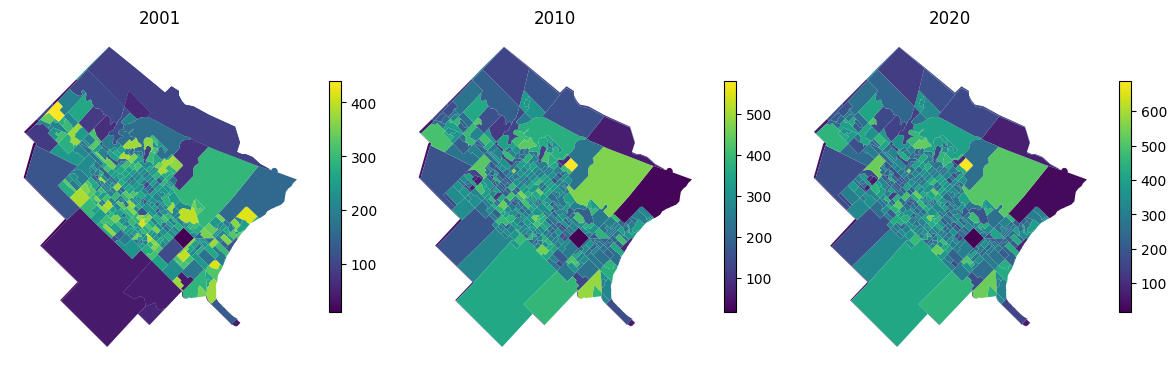

In [12]:
# Se evalúa la distribución generada con simulate_total_var
compare_chropleths(
    tipo_2001_geo,
    tipo_2010_geo,
    tipo_2010_geo,
    column=["total", "total", "total_2020"],
    titles=[2001, 2010, 2020],
)

# Proyeccion 2020

Ahora que contamos con el total de viviendas por radio censal para nuestro año de proyección (`2020`). Dicha columna se utilizará para estimar el total de viviendas correspondiente a alguna categoría específica. En nuestro caso, `viviendas en condiciones de informalidad-vulnerabilidad urbana`. 
Nuevamente, como no disponemos de las geometrías en `2020` el parámetro `forecast_gdf` se encuentra recibiendo el geodataframe de `2010` (ver `simulate_cat_var`).
Esta función recibe tres geodataframes. Dos para observar distribuciones por radio censal (`2001` y `2010`) y uno para modelar la distribución por radio en el año de proyección (`2020`).

La cantidad de viviendas de la categoría en cuestión se define a partir de un porcentaje teórico u observado. Este refleja el peso que tiene dicha categoría en el total de viviendas (e.g. `2.5%`).

Además, la función `simulate_cat_var` cuenta con el parámetro `calibration_vector` que permite incorporar una nueva distribución observada por radio censal. Más adelante, se ejemplifica su uso.

In [13]:
# Con catname uso la distribucion de una variable en 2001 y de otra en 2010 en funcion del diccionario que pasamos como parametro
simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_2001_geo,
    gdf_var_10=tipo_2010_geo,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_2010_geo,
    pct_val=1.5,
    catname={"2001": "casilla", "2010": "casilla"},
    tot_colname="total_2020",
    calibration_vector={'weights':None, 'mix_dist':False}
    )

# Seguimos usando el gdf 2010 como gdf de estimación
tipo_2010_geo["cat_sim_2020"] = tipo_2010_geo.index.map(simulated_distribution)
tipo_2010_geo["informal_2020"] = tipo_2010_geo["casilla"] + tipo_2010_geo["cat_sim_2020"] 

{'legend': True, 'legend_kwds': {'shrink': 0.3}}


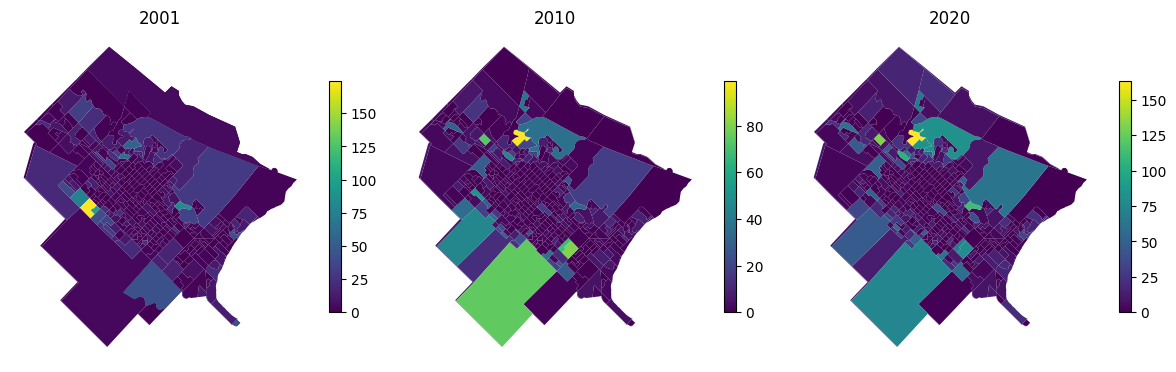

In [14]:
compare_chropleths(
    tipo_2001_geo,
    tipo_2010_geo,
    tipo_2010_geo,
    column=["casilla", "casilla", "informal_2020"],
    titles=[2001, 2010, 2020],
)

### Vectores de calibración

El parámetro `calibration_vector` de la función `simulate_cat_var` permite incluir una nueva distribución observada. En este ejemplo, utilizamos el porcentaje del área de un radio censal cubierta por el polígono de un asentamiento informal.

El diccionario que se utiliza debe especificar dos llaves. Una indicando el objeto que se va a mapear como vector de nuevos pesos ('weights') y otra indicando si esta distribución observada se va a utilizar junto a las de 2001-2010 o no (en este último caso, 'mix_dist':`False`).

In [15]:
import pandas as pd
from CENSAr.vector_data_analysis.geoprocessing import (from_wkt, build_thiner_pct_in_coarser_geom)

In [16]:
# Superficie cubierta por asentamientos informales
url = "https://storage.googleapis.com/python_mdg/censar_data/informal_settlements_072022.csv"
asentamientos = pd.read_csv(url)
asentamientos_gdf = from_wkt(df=asentamientos, wkt_column='geometry')

tipo_2010_reset = tipo_2010_geo.reset_index()
calibration_weights = build_thiner_pct_in_coarser_geom(coarser_geom=tipo_2010_reset, thiner_geom=asentamientos_gdf,
                                                       coarser_idx='link', thiner_idx='id_renabap', crs=5347)

In [17]:
simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_2001_geo,
    gdf_var_10=tipo_2010_geo,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_2010_geo,
    pct_val=1.2,
    catname={"2001": "casilla", "2010": "casilla"},
    tot_colname="total_2020",
    calibration_vector={'weights':calibration_weights, 'mix_dist':True}
    )

tipo_2010_geo["cat_sim_2020"] = tipo_2010_geo.index.map(simulated_distribution)
tipo_2010_geo["informal_2020"] = tipo_2010_geo["casilla"] + tipo_2010_geo["cat_sim_2020"] 

{'legend': True, 'legend_kwds': {'shrink': 0.3}}


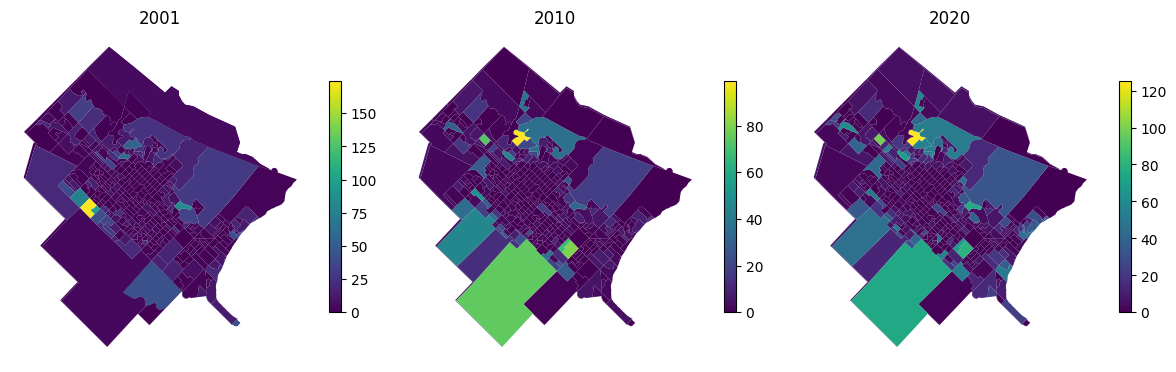

In [19]:
compare_chropleths(
    tipo_2001_geo,
    tipo_2010_geo,
    tipo_2010_geo,
    column=["casilla", "casilla", "informal_2020"],
    titles=[2001, 2010, 2020],
)

# Agregacion de indicadores

También es posible construir categorías agregadas para variables específicas. En este ejemplo, se evalúan algunas alternativas de agregación para la variable `tipo de vivienda`.

In [20]:
# Vemos las categorías disponibles
tipo_2001_geo.columns

Index(['geometry', 'casa a', 'casa b', 'rancho', 'casilla', 'departamento',
       'pieza en inquilinato', 'pieza en hotel o pension',
       'local no construido para habitacion', 'vivienda movil', 'en la calle',
       'total'],
      dtype='object')

In [21]:
tipo_2010_geo.columns

Index(['geometry', 'casa', 'rancho', 'casilla', 'departamento',
       'pieza en inquilinato', 'pieza en hotel o pension',
       'local no construido para habitacion', 'vivienda movil', 'en la calle',
       'total', 'total_2020', 'cat_sim_2020', 'informal_2020'],
      dtype='object')

In [22]:
from CENSAr.aggregation import named_aggregation

tipo_vivienda_agg_2001 = named_aggregation(
    tipo_2001_geo, name="tipo vivienda particular"
)
tipo_vivienda_agg_2010 = named_aggregation(
    tipo_2010_geo, name="tipo vivienda particular"
)

[11:31:55] INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=26557;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=202093;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=162446;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=871633;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

           INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=835597;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=480125;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping formal: {'casa b', 'casa a'}. Extra columns will be ]8;id=102960;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=200269;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    ignored.                                                                                       

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=807685;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=675753;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

In [23]:
formal_simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_vivienda_agg_2001,
    gdf_var_10=tipo_vivienda_agg_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_vivienda_agg_2010,
    pct_val=97,
    catname={"2001": "formal", "2010": "formal"},
    tot_colname="total_2020",
)
informal_simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_vivienda_agg_2001,
    gdf_var_10=tipo_vivienda_agg_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_vivienda_agg_2010, # dado que no existen geometrias para 2020, usamos 2010
    pct_val=2.5,
    catname={"2001": "informal", "2010": "informal"},
    tot_colname="total_2020",
)
calle_simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_vivienda_agg_2001,
    gdf_var_10=tipo_vivienda_agg_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_vivienda_agg_2010,
    pct_val=0.5,
    catname={"2001": "situacion de calle", "2010": "situacion de calle"},
    tot_colname="total_2020",
)

# Sumo los nuevos casos simulados sobre la distribucion conocida
tipo_vivienda_agg_2010["cat_sim_2020"] = tipo_vivienda_agg_2010.index.map(formal_simulated_distribution)
tipo_vivienda_agg_2010["formal_2020"] = tipo_vivienda_agg_2010["formal"] + tipo_2010_geo["cat_sim_2020"] 

tipo_vivienda_agg_2010["cat_sim_2020"] = tipo_vivienda_agg_2010.index.map(informal_simulated_distribution)
tipo_vivienda_agg_2010["informal_2020"] = tipo_vivienda_agg_2010["informal"] + tipo_2010_geo["cat_sim_2020"]

tipo_vivienda_agg_2010["cat_sim_2020"] = tipo_vivienda_agg_2010.index.map(calle_simulated_distribution)
tipo_vivienda_agg_2010["situacion de calle_2020"] = tipo_vivienda_agg_2010["situacion de calle"] + tipo_2010_geo["cat_sim_2020"]

{'legend': True, 'legend_kwds': {'shrink': 0.3}}


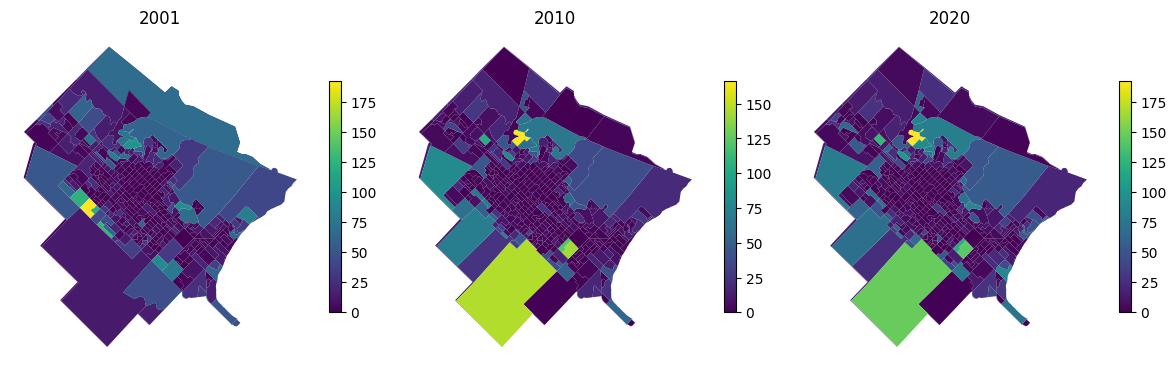

In [24]:
compare_chropleths(
    tipo_vivienda_agg_2001,
    tipo_vivienda_agg_2010,
    tipo_vivienda_agg_2010,
    column=["informal","informal","informal_2020"],
    titles=[2001, 2010, 2020],
)

{'legend': True, 'legend_kwds': {'shrink': 0.3}}


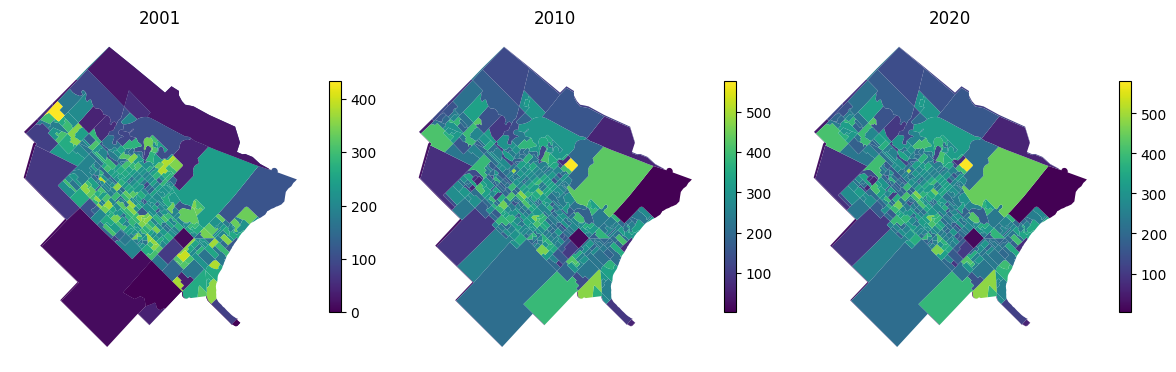

In [25]:
compare_chropleths(
    tipo_vivienda_agg_2001,
    tipo_vivienda_agg_2010,
    tipo_vivienda_agg_2010,
    column=["formal","formal","formal_2020"],
    titles=[2001, 2010, 2020],
)

### Subtitulo aca

In [62]:
inf_chaco = asentamientos_gdf.loc[(asentamientos_gdf['provincia'].isin(['Chaco'])) & 
                                  (asentamientos_gdf['departamento'].isin(['San Fernando']))].copy()

inf_chaco['decada_label'] = inf_chaco.decada_de_creacion.apply(lambda x: x[7:11])

df = pd.DataFrame(inf_chaco.groupby('decada_label')['cantidad_viviendas_aproximadas'].sum().astype(int))
df_ = df.loc[df.index.isin(['2000','2010']),['cantidad_viviendas_aproximadas']].copy()
df_['viviendas totales (CNPHV)'] = [tipo_vivienda_agg_2001['total'].sum(), tipo_vivienda_agg_2010['total'].sum()]
df_['viviendas informales (tipo - CNPHV)'] = [tipo_vivienda_agg_2001['informal'].sum(), tipo_vivienda_agg_2010['informal'].sum()]
df_.rename(columns={'cantidad_viviendas_aproximadas': 'viviendas informales (Renabap)'}, inplace=True)
df_ = df_[['viviendas informales (Renabap)', 'viviendas informales (tipo - CNPHV)', 'viviendas totales (CNPHV)']].copy()

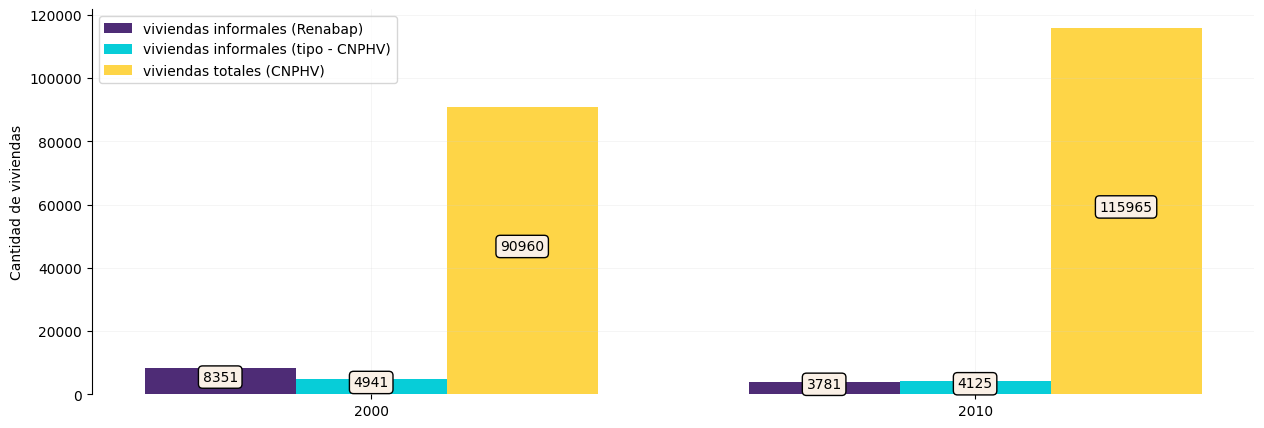

In [67]:
yaxis_formatter=None
xaxis_formatter=None
xticks_rotation = 0

fcolor = 'linen'
tcolor = 'black'

colors = {'viviendas informales (Renabap)':'#4e2c76', 
          'viviendas informales (tipo - CNPHV)':'#07cdd8', 
          'viviendas totales (CNPHV)':'#fed547'}
len_groups = 2
bar_width = 0.25

yaxis_name = 'Cantidad de viviendas'
ylim = None
chart_title = None
figsize=(15,5)

plot_grouped_bars(df_.T, figsize, chart_title, len_groups, bar_width, colors, fcolor, tcolor, yaxis_name, yaxis_formatter, ylim, xaxis_formatter, xticks_rotation)    

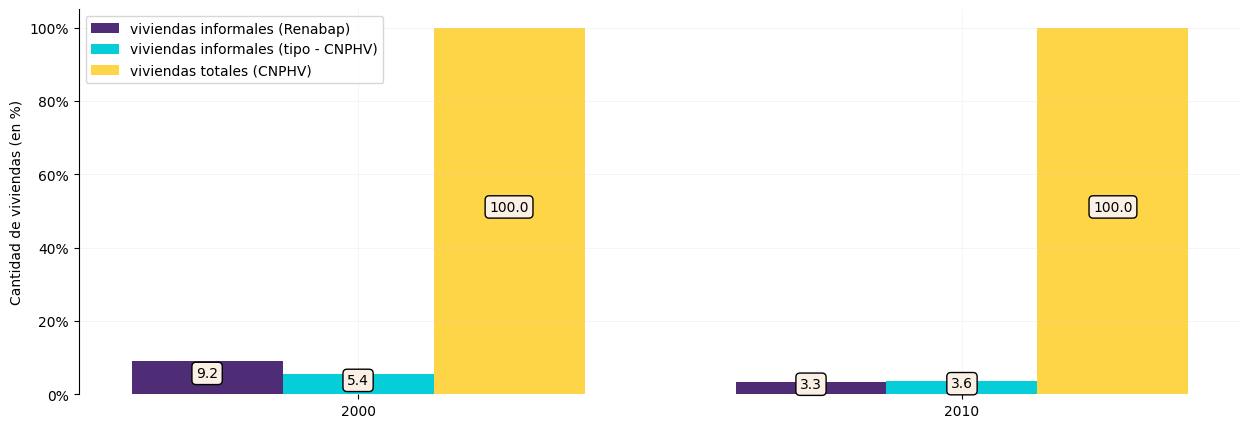

In [66]:
df_pct = df_.copy()
df_pct['viviendas informales (Renabap)'] = round(df_pct['viviendas informales (Renabap)']/df_pct['viviendas totales (CNPHV)']*100,1)
df_pct['viviendas informales (tipo - CNPHV)'] = round(df_pct['viviendas informales (tipo - CNPHV)']/df_pct['viviendas totales (CNPHV)']*100,1)
df_pct['viviendas totales (CNPHV)'] = round(df_pct['viviendas totales (CNPHV)']/df_pct['viviendas totales (CNPHV)']*100,1)

yaxis_formatter='{}%'

yaxis_name = 'Cantidad de viviendas (en %)'
figsize=(15,5)

plot_grouped_bars(df_pct.T, figsize, chart_title, len_groups, bar_width, colors, fcolor, tcolor, yaxis_name, yaxis_formatter, ylim, xaxis_formatter, xticks_rotation)

In [28]:
# calibrando por el area total de asentamientos informales
calibration_weights = build_thiner_pct_in_coarser_geom(coarser_geom=tipo_2010_reset, thiner_geom=asentamientos_gdf,
                                                       coarser_idx='link', thiner_idx='id_renabap', crs=5347, coarser_tot=False)

informal_simulated_distribution = simulate_cat_var(
    gdf_var_01=tipo_vivienda_agg_2001,
    gdf_var_10=tipo_vivienda_agg_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=tipo_vivienda_agg_2010,
    pct_val=1.5,
    catname={"2001": "informal", "2010": "informal"},
    tot_colname="total_2020",
    calibration_vector={'weights':calibration_weights, 'mix_dist':True}
)

tipo_vivienda_agg_2010["cat_sim_2020"] = tipo_vivienda_agg_2010.index.map(informal_simulated_distribution)
tipo_vivienda_agg_2010["informal_2020"] = tipo_vivienda_agg_2010["informal"] + tipo_vivienda_agg_2010["cat_sim_2020"] 

{'scheme': 'NaturalBreaks', 'k': 4, 'legend': True, 'legend_kwds': {'fmt': '{:.0f}'}}


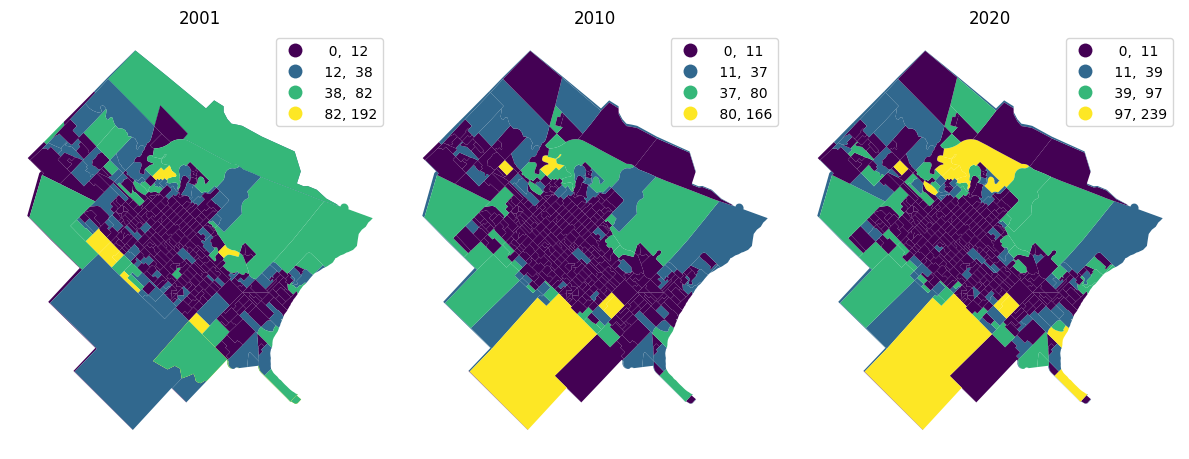

In [104]:
compare_chropleths(
    tipo_vivienda_agg_2001,
    tipo_vivienda_agg_2010,
    tipo_vivienda_agg_2010,
    column=["informal","informal","informal_2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0f}'},
    scheme = "NaturalBreaks",
    k = 4
)

# ACA PLOTS CON LAS DISTRIBUCIONES POR RADIO

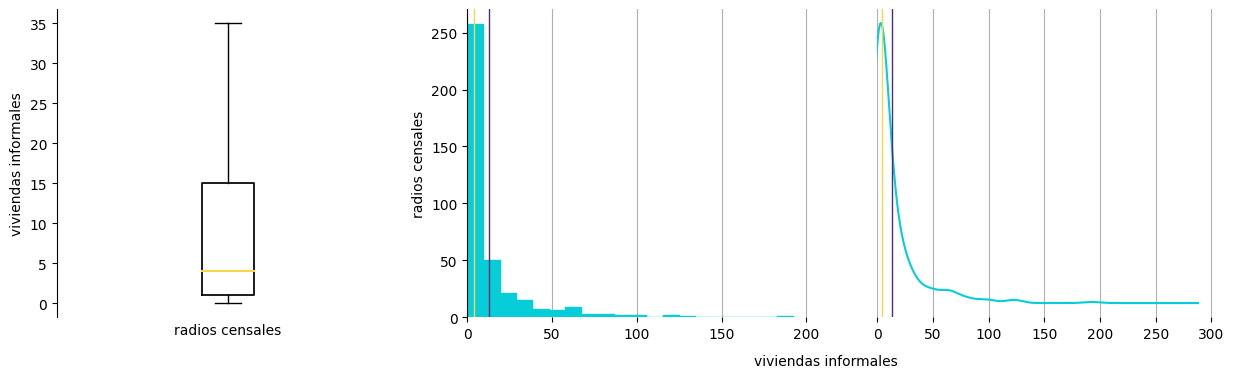

In [99]:
plot_dist_continvar(serie=tipo_vivienda_agg_2001['informal'], figsize=(15,4), fill_hist=True, 
                    xlabel='radios censales', ylabel='viviendas informales', tit=None, bval=20, lim=None)

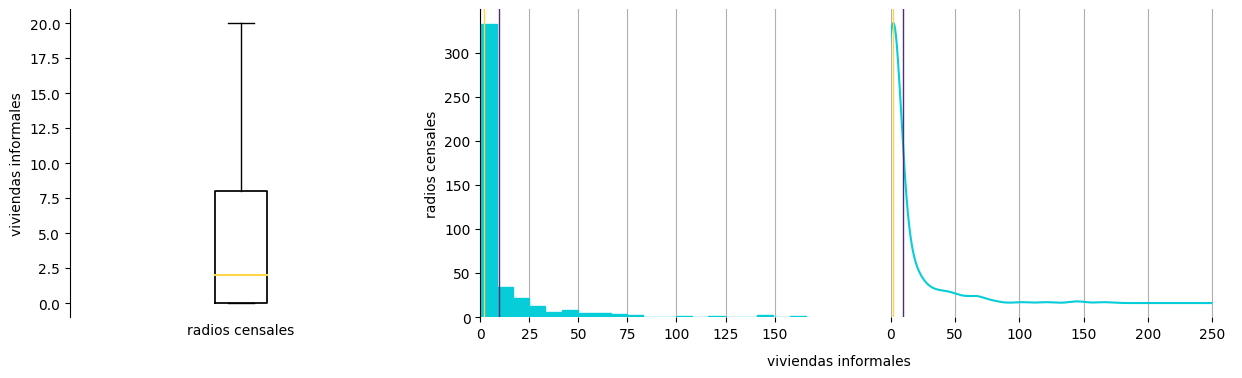

In [100]:
plot_dist_continvar(serie=tipo_vivienda_agg_2010['informal'], figsize=(15,4), fill_hist=True, 
                    xlabel='radios censales', ylabel='viviendas informales', tit=None, bval=20, lim=None)

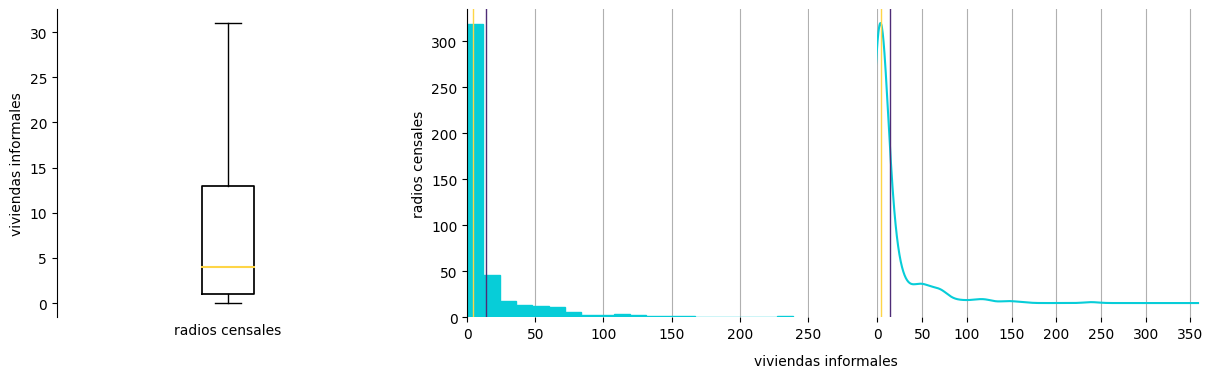

In [103]:
plot_dist_continvar(serie=tipo_vivienda_agg_2010['informal_2020'], figsize=(15,4), fill_hist=True, 
                    xlabel='radios censales', ylabel='viviendas informales', tit=None, bval=20, lim=None)

{'scheme': 'NaturalBreaks', 'k': 4, 'legend': True, 'legend_kwds': {'fmt': '{:.0%}'}}


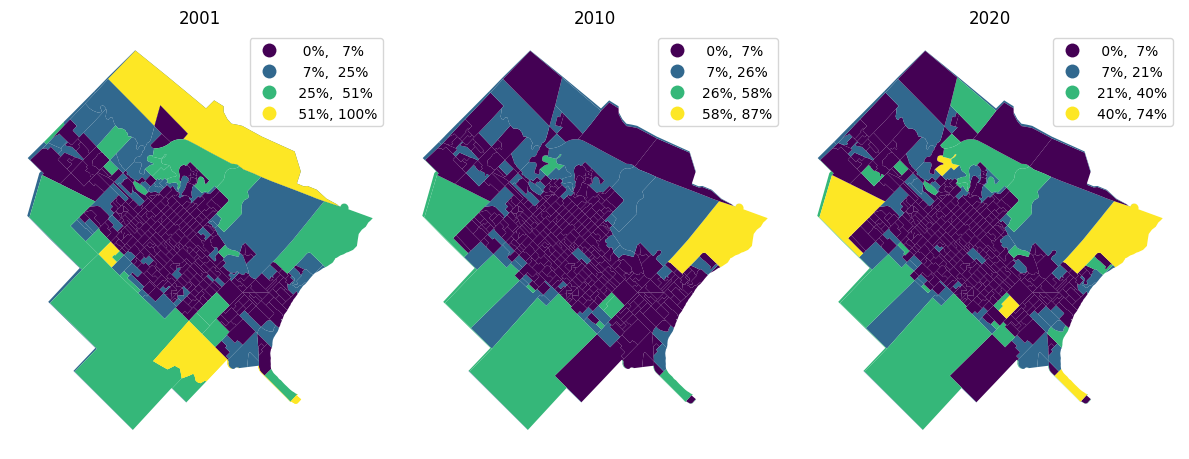

In [105]:
tipo_vivienda_agg_2010['pct_informal_2020'] = round((tipo_vivienda_agg_2010['informal_2020']/tipo_vivienda_agg_2010['total_2020']),2)
tipo_vivienda_agg_2010['pct_informal'] = round((tipo_vivienda_agg_2010['informal']/tipo_vivienda_agg_2010['total']),2)
tipo_vivienda_agg_2001['pct_informal'] = round((tipo_vivienda_agg_2001['informal']/tipo_vivienda_agg_2001['total']),2)

compare_chropleths(
    tipo_vivienda_agg_2001,
    tipo_vivienda_agg_2010,
    tipo_vivienda_agg_2010,
    column=["pct_informal","pct_informal","pct_informal_2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0%}'},
    scheme = "NaturalBreaks",
    k = 4
)

### Otras agregaciones

In [32]:
vulnerabilidad_2001 = named_aggregation(
    tipo_vivienda_agg_2001,
    name="vulnerabilidad urbana",
)
vulnerabilidad_2010 = named_aggregation(
    tipo_vivienda_agg_2010,
    name="vulnerabilidad urbana",
)
vulnerable_simulated_distribution = simulate_cat_var(
    gdf_var_01=vulnerabilidad_2001,
    gdf_var_10=vulnerabilidad_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=vulnerabilidad_2010,
    pct_val=2,
    catname={"2001": "vulnerable", "2010": "vulnerable"},
    tot_colname="total_2020",
)
no_vulnerable_simulated_distribution = simulate_cat_var(
    gdf_var_01=vulnerabilidad_2001,
    gdf_var_10=vulnerabilidad_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=vulnerabilidad_2010,
    pct_val=98,
    catname={"2001": "no vulnerable", "2010": "no vulnerable"},
    tot_colname="total_2020",
)

vulnerabilidad_2010["cat_sim_2020"] = vulnerabilidad_2010.index.map(vulnerable_simulated_distribution)
vulnerabilidad_2010["vulnerable_2020"] = vulnerabilidad_2010["vulnerable"] + vulnerabilidad_2010["cat_sim_2020"] 

vulnerabilidad_2010["cat_sim_2020"] = vulnerabilidad_2010.index.map(no_vulnerable_simulated_distribution)
vulnerabilidad_2010["no vulnerable 2020"] = vulnerabilidad_2010["no vulnerable"] + vulnerabilidad_2010["cat_sim_2020"] 

[11:32:09] INFO     Applying named aggregation `vulnerabilidad urbana`                                   ]8;id=256505;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=452811;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           INFO     Applying named aggregation `vulnerabilidad urbana`                                   ]8;id=965230;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=884075;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

{'scheme': 'NaturalBreaks', 'k': 5, 'legend': True, 'legend_kwds': {'fmt': '{:.0f}'}}


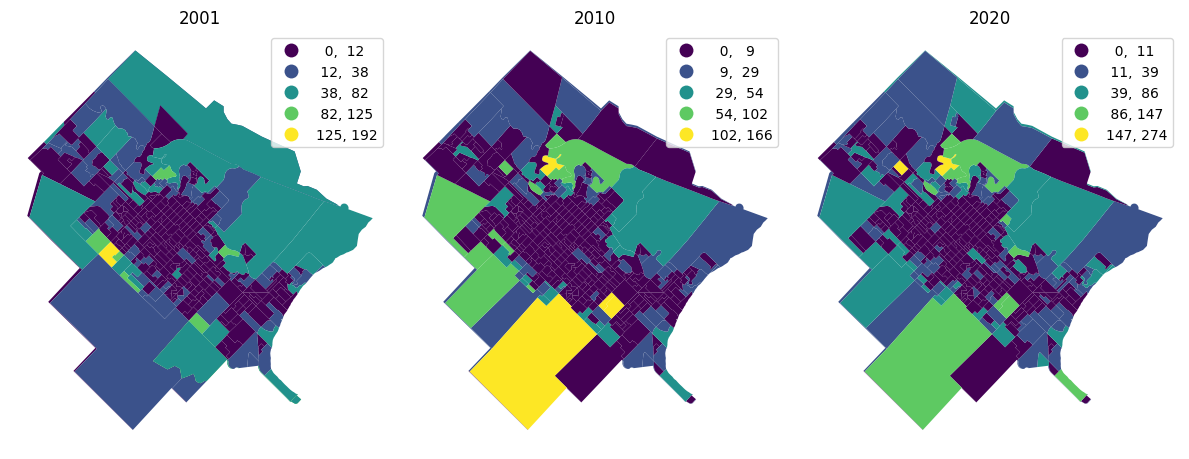

In [33]:
compare_chropleths(
    vulnerabilidad_2001,
    vulnerabilidad_2010,
    vulnerabilidad_2010,
    column=["vulnerable", "vulnerable", "vulnerable_2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0f}'},
    scheme = "NaturalBreaks",
    k = 5
)

{'scheme': 'NaturalBreaks', 'k': 5, 'legend': True, 'legend_kwds': {'fmt': '{:.0f}'}}


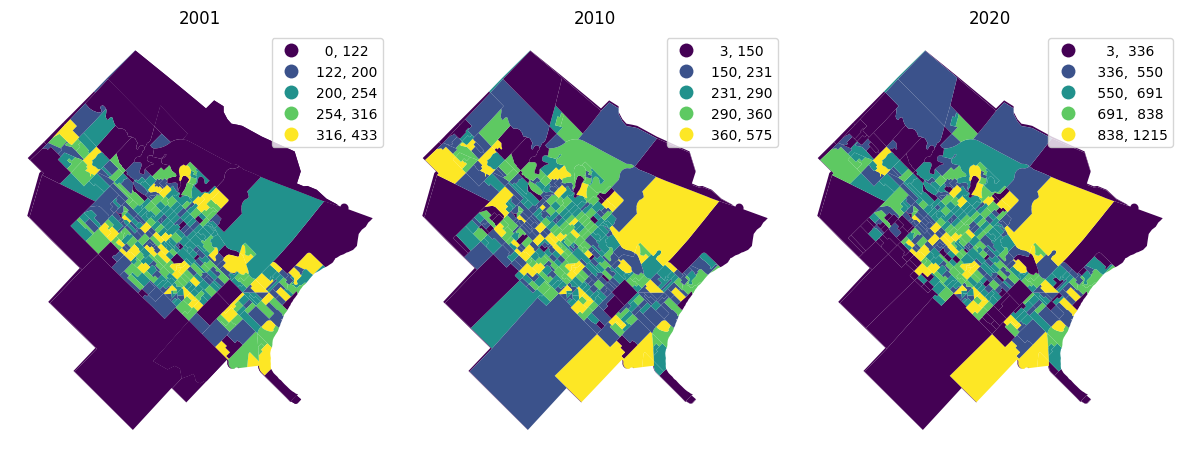

In [34]:
compare_chropleths(
    vulnerabilidad_2001,
    vulnerabilidad_2010,
    vulnerabilidad_2010,
    column=["no vulnerable", "no vulnerable", "no vulnerable 2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0f}'},
    scheme = "NaturalBreaks",
    k = 5
)

In [35]:
# calibrando por asentamientos informales
vulnerabilidad_2010_reset = vulnerabilidad_2010.reset_index()
calibration_weights = build_thiner_pct_in_coarser_geom(coarser_geom=vulnerabilidad_2010_reset, thiner_geom=asentamientos_gdf,
                                                       coarser_idx='link', thiner_idx='id_renabap', crs=5347, coarser_tot=False)

vulnerable_simulated_distribution = simulate_cat_var(
    gdf_var_01=vulnerabilidad_2001,
    gdf_var_10=vulnerabilidad_2010,
    base_year="0110",
    forecast_year="2020",
    forecast_gdf=vulnerabilidad_2010,
    pct_val=1.5,
    catname={"2001": "vulnerable", "2010": "vulnerable"},
    tot_colname="total_2020",
    calibration_vector={'weights':calibration_weights, 'mix_dist':True}
)

vulnerabilidad_2010["cat_sim_2020"] = vulnerabilidad_2010.index.map(vulnerable_simulated_distribution)
vulnerabilidad_2010["vulnerable_2020"] = vulnerabilidad_2010["vulnerable"] + vulnerabilidad_2010["cat_sim_2020"] 

{'scheme': 'NaturalBreaks', 'k': 4, 'legend': True, 'legend_kwds': {'fmt': '{:.0f}'}}


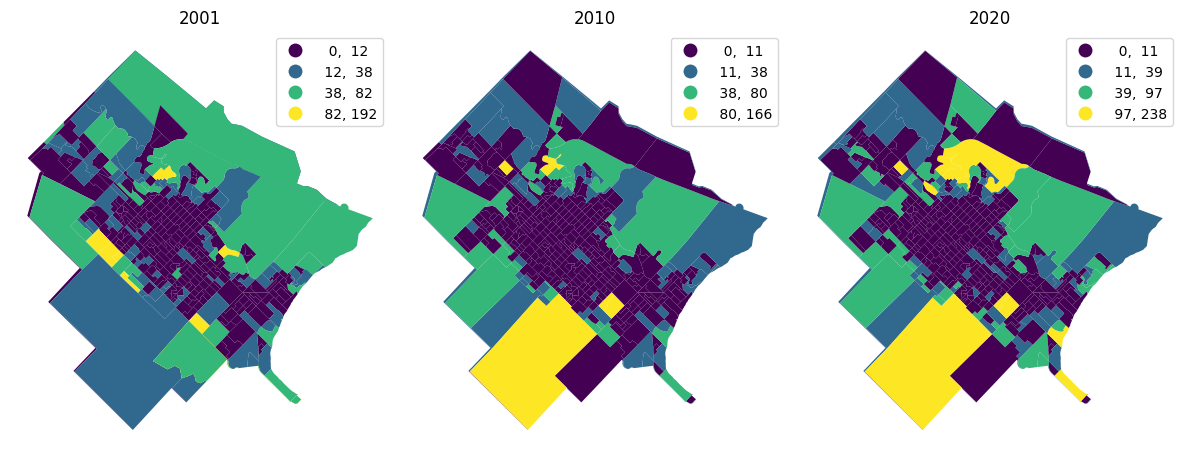

In [36]:
compare_chropleths(
    vulnerabilidad_2001,
    vulnerabilidad_2010,
    vulnerabilidad_2010,
    column=["vulnerable", "vulnerable", "vulnerable_2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0f}'},
    scheme = "NaturalBreaks",
    k = 4
)

In [37]:
vulnerabilidad_2010['pct_vulnerable_2020'] = round((vulnerabilidad_2010['vulnerable_2020']/vulnerabilidad_2010['total_2020']),2)
vulnerabilidad_2010['pct_vulnerable'] = round((vulnerabilidad_2010['vulnerable']/vulnerabilidad_2010['total']),2)
vulnerabilidad_2001['pct_vulnerable'] = round((vulnerabilidad_2001['vulnerable']/vulnerabilidad_2001['total']),2)

{'scheme': 'NaturalBreaks', 'k': 4, 'legend': True, 'legend_kwds': {'fmt': '{:.0%}'}}


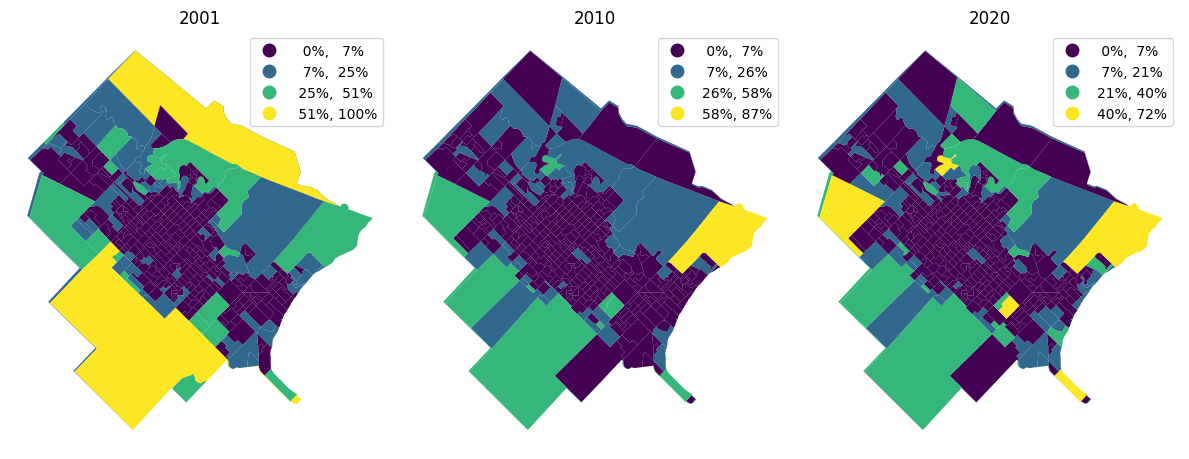

In [38]:
compare_chropleths(
    vulnerabilidad_2001,
    vulnerabilidad_2010,
    vulnerabilidad_2010,
    column=["pct_vulnerable","pct_vulnerable","pct_vulnerable_2020"],
    titles=[2001, 2010, 2020],
    legend_kwds = {'fmt':'{:.0%}'},
    scheme = "NaturalBreaks",
    k = 4
)